In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import seaborn as sns
import numpy as np
import datetime

In [102]:
TV_df = pd.read_csv("data_TV.csv")

In [103]:
TV_df.dtypes

first_air_date        object
origin_country        object
original_language     object
name                  object
popularity           float64
vote_average         float64
vote_count             int64
overview              object
dtype: object

##### Filling all nulls with 'Unknown'

In [104]:
TV_df.overview = TV_df.overview.fillna('Unknown')
# TV_df.first_air_date = TV_df.first_air_date.fillna('Unknown')

# TV_df[TV_df.first_air_date != 'Unknown']['first_air_date'] = pd.to_datetime(TV_df['first_air_date'])

In [105]:
TV_df.dtypes

first_air_date        object
origin_country        object
original_language     object
name                  object
popularity           float64
vote_average         float64
vote_count             int64
overview              object
dtype: object

In [106]:
TV_df.count()

first_air_date       2611
origin_country       2617
original_language    2617
name                 2617
popularity           2617
vote_average         2617
vote_count           2617
overview             2617
dtype: int64

In [107]:
TV_df['origin_country'].value_counts().sort_values(ascending= False).head(20)

US               1377
JP                393
GB                169
MX                148
KR                 98
CO                 55
ES                 49
CA                 39
c("CA", "US")      24
character(0)       23
BR                 20
TR                 20
FR                 19
IT                 13
AR                 11
DE                 11
c("US", "CA")      11
CN                 10
c("GB", "US")       9
AU                  8
Name: origin_country, dtype: int64

In [108]:
TV_df["countryLen"]= TV_df["origin_country"].str.len()

In [109]:
TV_df.count()

first_air_date       2611
origin_country       2617
original_language    2617
name                 2617
popularity           2617
vote_average         2617
vote_count           2617
overview             2617
countryLen           2617
dtype: int64

In [110]:
TV_df[TV_df.countryLen == 2]['origin_country'].value_counts().sort_values(ascending= False).head(15)

US    1377
JP     393
GB     169
MX     148
KR      98
CO      55
ES      49
CA      39
TR      20
BR      20
FR      19
IT      13
AR      11
DE      11
CN      10
Name: origin_country, dtype: int64

In [111]:
top_15 = TV_df[TV_df.countryLen == 2].groupby('origin_country').count().reset_index().sort_values(ascending=False, by='origin_country')[0:15]['origin_country']
top_15_df = TV_df[TV_df['origin_country'].isin(top_15)]


##### !!Try and display numbers on top of bars

Text(0.5, 1.0, 'Total Show count according to type')

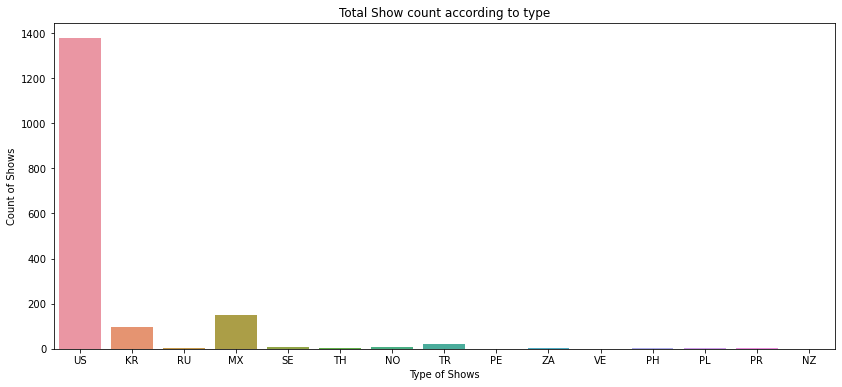

In [112]:
plt.figure(figsize=(14,6))
sns.countplot(x='origin_country', data=top_15_df)
plt.xlabel('Type of Shows')
plt.ylabel('Count of Shows')
plt.title('Total Show count according to type')

##### !!Trying to make a scatter plot of movies produced by the top 15 countries for each year.

In [113]:

TV_df['Year'] = TV_df[TV_df.first_air_date != 'Unkown']['first_air_date'].dropna().astype(str).str[0:4] 

print(TV_df['Year'])




0       2021
1       2008
2       2021
3       2013
4       2022
        ... 
2612    2002
2613    2000
2614    1997
2615    1985
2616    2006
Name: Year, Length: 2617, dtype: object


In [114]:
TV_df.dtypes

first_air_date        object
origin_country        object
original_language     object
name                  object
popularity           float64
vote_average         float64
vote_count             int64
overview              object
countryLen             int64
Year                  object
dtype: object

In [115]:
TV_df.Year = TV_df.Year.astype(float)
TV_df.dtypes

first_air_date        object
origin_country        object
original_language     object
name                  object
popularity           float64
vote_average         float64
vote_count             int64
overview              object
countryLen             int64
Year                 float64
dtype: object

In [168]:
top_15 = TV_df[TV_df.countryLen == 2].groupby('origin_country').count().reset_index().sort_values(ascending=False, by='origin_country')['origin_country']
top_15_df = TV_df[TV_df['origin_country'].isin(top_15)]


(1970.0, 2021.0)

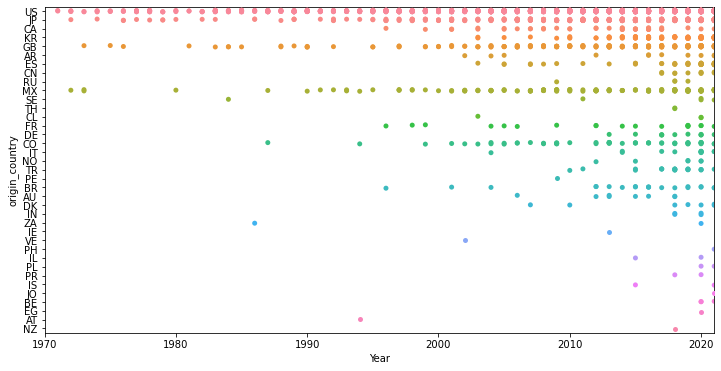

In [169]:
plt.figure(figsize=(12,6))
sns.stripplot(y='origin_country', x='Year', data=top_15_df)
plt.xlim(1970,2021)

In [170]:
TV_df[TV_df.origin_country =='US'].groupby('name')['popularity'].max().sort_values(ascending=False).head(10)

name
House of the Dragon                           6684.611
Dahmer – Monster: The Jeffrey Dahmer Story    5865.900
The Lord of the Rings: The Rings of Power     4787.462
She-Hulk: Attorney at Law                     2493.030
Rick and Morty                                1511.996
Chucky                                        1480.652
The Walking Dead                              1443.081
American Horror Story                         1193.941
Game of Thrones                               1063.455
Grey's Anatomy                                 838.791
Name: popularity, dtype: float64

In [171]:
TV_df[TV_df.origin_country =='US'].groupby('name')['vote_average'].max().sort_values(ascending=False).head(10)

name
The D'Amelio Show       9.0
Breaking Bad            8.8
Arcane                  8.7
Helluva Boss            8.7
The Owl House           8.7
Big Time Rush           8.7
Primal                  8.7
The Umbrella Academy    8.7
The Kardashians         8.7
Invincible              8.7
Name: vote_average, dtype: float64

In [172]:
# plt.figure(figsize=(12,6))
TV_df[TV_df.origin_country =='US'].groupby('name')['vote_count','Year',''].mean().sort_values(ascending=False).head(10)
# sns.barplot(y='origin_country', x='vote_average', data=top_15_df)
# plt.xlim(1970,2021)
# .sort_values(ascending=False)

name
Game of Thrones     19459
Stranger Things     14027
The Walking Dead    13802
Riverdale           12828
Lucifer             12599
The Good Doctor     10868
WandaVision         10538
Breaking Bad        10131
The Flash            9993
Loki                 9319
Name: vote_count, dtype: int64

In [173]:
TV_df[TV_df.origin_country =='US'].groupby('Year')['name'].count().sort_values(ascending=False).head(20)

Year
2020.0    122
2021.0    108
2019.0     93
2017.0     74
2018.0     70
2016.0     68
2015.0     67
2014.0     65
2013.0     48
2012.0     41
2011.0     41
2009.0     41
2010.0     39
2022.0     37
2005.0     30
2003.0     29
2008.0     25
2007.0     24
2004.0     23
2001.0     20
Name: name, dtype: int64

##### How many movies were made by each top 15 country in 2020?

(1970.0, 2021.0)

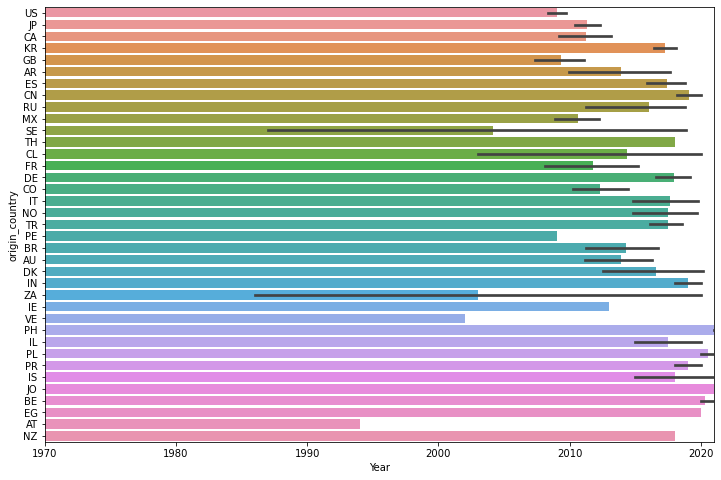

In [177]:
plt.figure(figsize=(12,8))
sns.barplot(y='origin_country', x='Year', data=top_15_df)
plt.xlim(1970,2021)